<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                129 non-null    int64 
 1   subject_id            129 non-null    int64 
 2   hadm_id               129 non-null    int64 
 3   admittime             129 non-null    object
 4   dischtime             129 non-null    object
 5   deathtime             40 non-null     object
 6   admission_type        129 non-null    object
 7   admission_location    129 non-null    object
 8   discharge_location    129 non-null    object
 9   insurance             129 non-null    object
 10  language              81 non-null     object
 11  religion              128 non-null    object
 12  marital_status        113 non-null    object
 13  ethnicity             129 non-null    object
 14  edregtime             92 non-null     object
 15  edouttime             92 non-null     ob

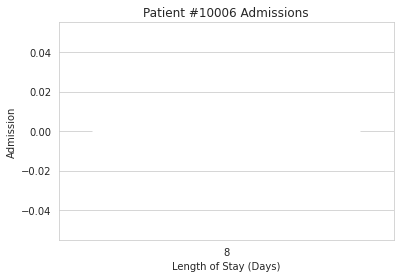

In [11]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datapath = '../data/physionet.org/mimic-iii-demo/1.4/'

# Load the MIMIC-III demo dataset
df = pd.read_csv(os.path.join(datapath, 'ADMISSIONS.csv'))
print(df.info())
# Filter the dataset to include only the data for one patient
patient_id = 10006
patient_data = df[df['subject_id'] == patient_id]

# Extract the start and end times for each admission
start_times = list(patient_data['admittime'])
end_times = list(patient_data['dischtime'])

# Create a DataFrame with the start and end times for each admission
data = pd.DataFrame({
    'start': start_times,
    'end': end_times
})

# Convert the start and end times to datetime objects
data['start'] = pd.to_datetime(data['start'])
data['end'] = pd.to_datetime(data['end'])

# Add a column with the length of each admission in days
data['duration'] = (data['end'] - data['start']).dt.days

# Add a column with the index of each admission
data['admission'] = range(len(data))

print(data.info())
# Create the Gantt chart using Seaborn
sns.set_style("whitegrid")
fig = sns.barplot(x='duration', y='admission', data=data, color="b")
fig.set_xlabel("Length of Stay (Days)")
fig.set_ylabel("Admission")
fig.set_title("Patient #{} Admissions".format(patient_id))

# # Customize the x-axis labels to show days
# xlabels = [str(i) + " days" for i in range(max(data['duration'])+1)]
# fig.set(xticklabels=xlabels)

plt.show()

In [6]:
data

,start,end,duration,admission
